# Datasets y Dataloaders
Es importante definir un flujo de trabajo sencillo para la carga y procesamiento de los datasets. Pytorch provee 2 utilidades escenciales: DataLoader y Dataset que permite el uso de datasets precargados y también el uso de datos personalizados.

Pytorch posee un gran número de datasets pre-cargados, estos se pueden usar para prototipar y probar modelos.

## Carga de modelos
Para este ejemplo cargaremos el dataset Fashion-MNIST desde TorchVision. Este dataset consiste en 60000 muestras de entrenamiento y 10000 muestras para pruebas, cada muestra es una imagen en escala de grises de 28x28 pixeles y una etiqueta asociada entre 10 clases.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterando y visualizando el dataset

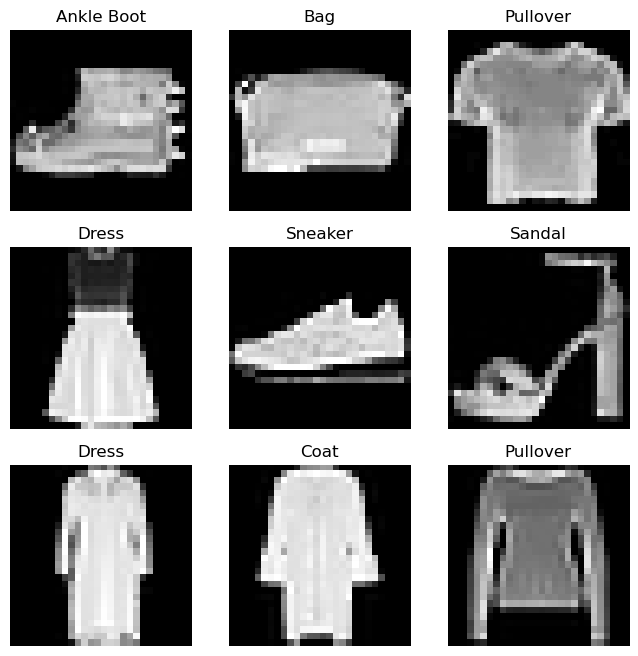

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # using get_item operator
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparando un dataset personalizado
Un dataset personalizado debe implementar 3 funciones: `__init__`, `__len__` y `__getitem__`. Aca una implementacion posbiel del dataset en el cual las imagenes estan almacenadas en un directorio `img_dir` y las etiquetas estan almacenadas en un archivo CSV `annotations_file`

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class DogsDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

## Preparando datos para el entrenamiento usando DataLoaders
Los Datasets recuperan los features y etiquetas de nuestro conjunto de datos una muestra a la vez. Al entrenar un modelo, generalmente necesitaremos pasar los datos como minibatches, ordenar aleatoriamente el conjunto en cada época para evitar el overfitting y usar multiprocesamiento para incrementar la velocidad de lectura.

DataLoader es un iterable especial de pytorch que abstrae estas tareas con una API simple de manejar.

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


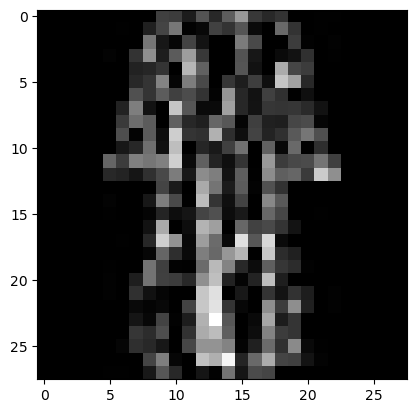

Label: 3


In [12]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")